## Data Visualization

### Matplotlib

Matplotlib allows an easy integration with Pandas to create charts from a DataFrame: Barcharts, Scatterplots, Curbs, etc. with custom Axes and Colors.

In [1]:
import pandas as pd # Import Pandas First

# To Keep Your Charts Inside iPython Notebook: 
%matplotlib inline
import matplotlib

pd.options.display.mpl_style = 'default' # To Get Prettier Layouts

In [ ]:
coffee = pd.read_csv("data/coffee_shop.csv", 
                     parse_dates = True, # To Parse Dates (Which Are In Column 1))
                     index_col=1) # To Use Dates As Indices

In [ ]:
coffee[['Margin','Total Expenses']].resample('M',how='sum').plot(ylim=[0,120])

# To Display The Evolution Of Margins And Expenses
# .resample("M",how="sum") Is To Sort By Month
# ylim=[0,120] Is To Display y Axis Between 0 And 120

In [ ]:
coffee['Profit'].resample('Q',how='mean').plot(ylim=[0,80])

# .resample('Q',how='mean') Is To Display By Quarter

In [ ]:
def part(x): # Function To Get The Percentage Of A Value, Use groupby("Label").apply.(part) to Display The Result
    return 100*x/float(x.sum())

In [ ]:
.plot(kind="barh") # Horizontal Bar
.plot(kind="scatter",y="Label2",x="Label1") # ScatterPlot

### Folium 

In [ ]:
import folium
from IPython.display import HTML

def inline_map(map): # To Integrate Folium Within iPython Notebook
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 510px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))

In [ ]:
map = folium.Map(location=[48.8655909,2.378983], zoom_start=6)

# Create A Map With Specific Latitude, Longitude And Zoom

In [ ]:
map.simple_marker([48.8655909,2.378983],popup="Pop-up!") 
# To Pin A Specific Location On Your Map, With An Interactive Pop-Up
map.circle_marker([48.8655909,2.378983]) # For a Simple Dot


inline_map(map) # Display The Map

#### Using Folium From Pandas DataFrames

In [10]:
import pandas as pd

In [ ]:
mcdo = pd.read_csv("data/McDonalds_Fr.csv",encoding='latin-1') # Import The CSV File

map_mcdo = folium.Map(location=[48.8655909,2.378983], zoom_start=6, tiles='Mapbox Bright')
# Create A Centered Map With A "Mapbox Bright" Style

for x in mcdo.values: # Loop To Append mcdo Values To The Map
    location = []
    location.append(x[1])
    location.append(x[0])
    map_mcdo.circle_marker(location,radius=4,fill_color='red',popup=x[2])

inline_map(map_mcdo) # Display Map

#### Using Folium From GeoJSON Files

In [ ]:
map_departement = folium.Map(location=[48,2], zoom_start=3) # Create Custom Map

map_departement.geo_json(geo_path="data/departements.json") # Import GeoJSON File With Geographical Polygons

inline_map(map_departement) # Display

In [ ]:
# Merge CSV Data and a GeoJSON File In A Folium Map

dep_data = pd.read_csv('data/dep_chomage.csv') # Import Input Data

map_chomage = folium.Map(location=[48,2], zoom_start=3) # Create Map With Data

map_chomage.geo_json(geo_path="data/departements.json", data=dep_data, # Put The Data & The JSON File In the Map
             columns=['CODE_DEPT', 'TAUX_CHOMAGE'],
             key_on='feature.code',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Unemployment Rate (%)') # Map Legend

map_chomage.create_map(path='map_chomage.html') # Create The File

### Matlab-like Plotting With Pylab

In [29]:
%matplotlib inline

In [30]:
import matplotlib # Imports To Be Made Separately
import matplotlib.pyplot as plt

In [31]:
import numpy as np

In [32]:
from pylab import *

In [33]:
x = np.linspace(0, 5, 10) # Set The Plot (Origin, y Intervals, x Limit)
y = x ** 2

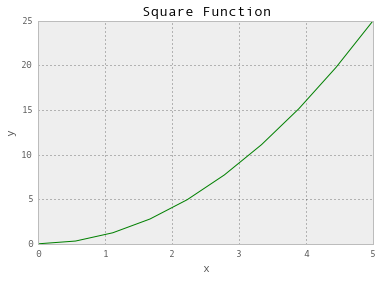

In [40]:
figure()
plot(x, y, 'g') # (Axes, Color)
xlabel('x')
ylabel('y')
title('Square Function')
show()

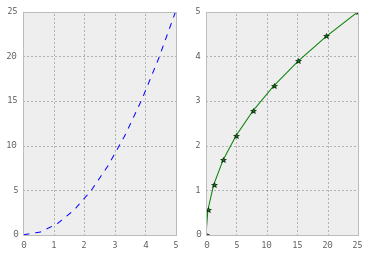

In [48]:
subplot(1,2,1) # Sub-Plots Of The Previous Function
plot(x, y, 'b--')
subplot(1,2,2) # y And x Are  Switched
plot(y, x, 'g*-'); # Green Curb With Dots

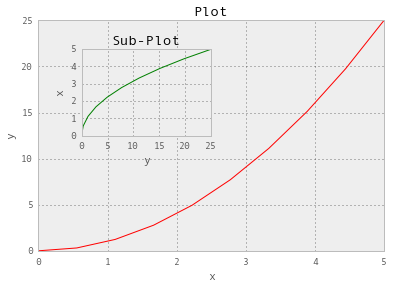

In [49]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes, # left, bottom, width, height (range 0 to 1)
axes2 = fig.add_axes([0.2, 0.5, 0.3, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Plot')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('Sub-Plot');

In [51]:
fig.savefig("filename.png") # Save The Plot

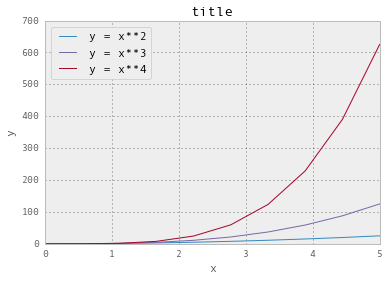

In [60]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.plot(x, x**4, label="y = x**4")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


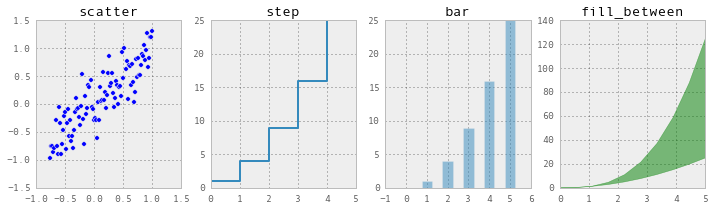

In [65]:
xx = np.linspace(-0.75, 1., 100)

n = np.array([0,1,2,3,4,5])

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");